In [50]:
import os
import sys

# Add 'libs' path to sys.path in a notebook-friendly way
notebook_dir = os.getcwd()
base_path = os.path.abspath(os.path.join(notebook_dir, "../"))
if base_path not in sys.path:
    sys.path.append(base_path)

In [ ]:
import ezdxf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib.colors as mcolors

In [52]:
from libs.utils.config_plot import PlotConfig

PlotConfig.setup_matplotlib(ts_serie=True)
%matplotlib inline

In [53]:
# Definir el estilo general de seaborn
sns.set_theme(style="whitegrid", palette="muted", font="Arial")

In [54]:
df = pd.read_csv(f"{base_path}/var/sample_client/sample_project/processed_data/operativity.csv", sep=";")
# df = df.dropna()
df['east'] = df['east'].astype(float).values
df['north'] = df['north'].astype(float).values

In [55]:
df.head()

,structure,sensor_type,code,east,north,elevation,operativiy,group,first_record,first_value,last_record,last_value,max_value
0,DME_CHO,PCV,PCV-SH23-101,808745.856,9158796.915,2563.591,True,NaN,2023-09-03,0.0,2025-03-08,-0.752380,5.492949
1,DME_CHO,PCV,PCV-SH23-102,808893.765,9158919.897,2526.313,True,NaN,2023-09-14,0.0,2025-03-30,-35.556892,0.000000
2,DME_CHO,PCV,PCV-SH23-103,808944.542,9159043.519,2512.112,True,NaN,2023-09-19,0.0,2025-03-30,2.524602,4.599337
3,DME_SUR,PCV,PCV-SH17-101,809676.294,9156254.521,2502.257,True,NaN,2024-10-20,-0.0,2025-04-03,40.678158,77.419430
4,PAD_1A,PCV,PCV-SH14-01,809665.799,9158500.421,2819.153,True,NaN,2015-10-09 10:57:00.000,-0.0,2025-03-30 06:00:00.000,-2.623270,4.866984


In [56]:
# Agrupar por 'structure' y 'sensor_type' y contar las ocurrencias
distribution = df.groupby(['structure', 'sensor_type']).size().reset_index(name='count')

print(distribution)

    structure sensor_type  count
0     DME_CHO         PCT     44
1     DME_CHO         PCV      3
2     DME_CHO         PTA      3
3     DME_SUR         PCT     18
4     DME_SUR         PCV      1
5     DME_SUR         PTA      2
6      PAD_1A         PCV      4
7      PAD_1A         PTA     14
8      PAD_2A        CPCV      2
9      PAD_2A         PCT     11
10     PAD_2A         PCV      3
11     PAD_2A         PTA      5
12     PAD_2A        SACV      2
13  PAD_2B_2C         PCT     29
14  PAD_2B_2C         PCV     20
15  PAD_2B_2C         PTA      6
16  PAD_2B_2C        SACV      3


In [57]:
sensor_types = df['sensor_type'].unique()
print(sensor_types)

['PCV' 'PTA' 'PCT' 'SACV' 'CPCV']


In [58]:
structures = distribution['structure'].unique()
print(structures)

['DME_CHO' 'DME_SUR' 'PAD_1A' 'PAD_2A' 'PAD_2B_2C']


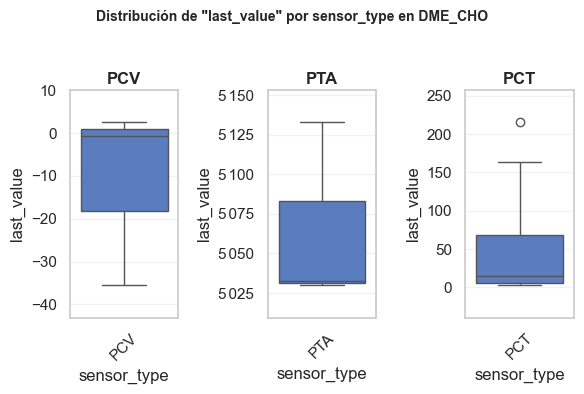

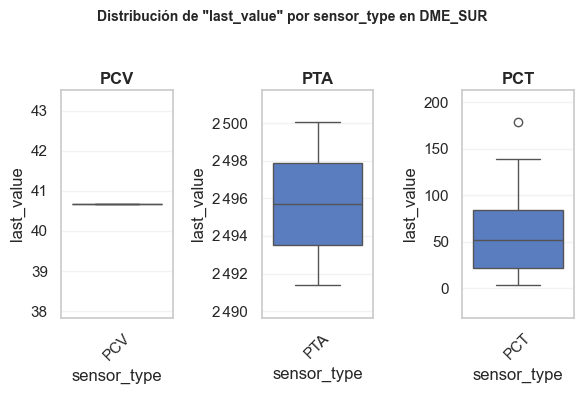

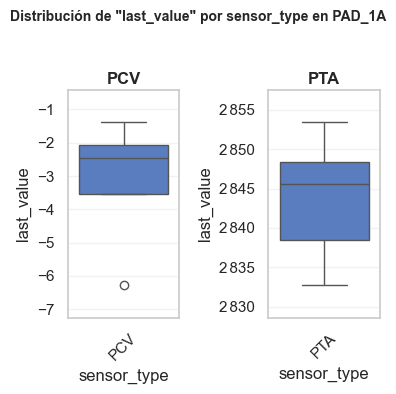

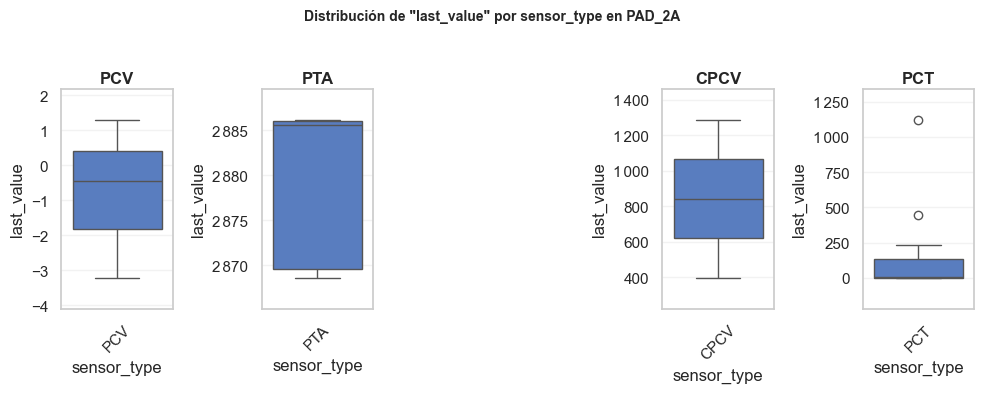

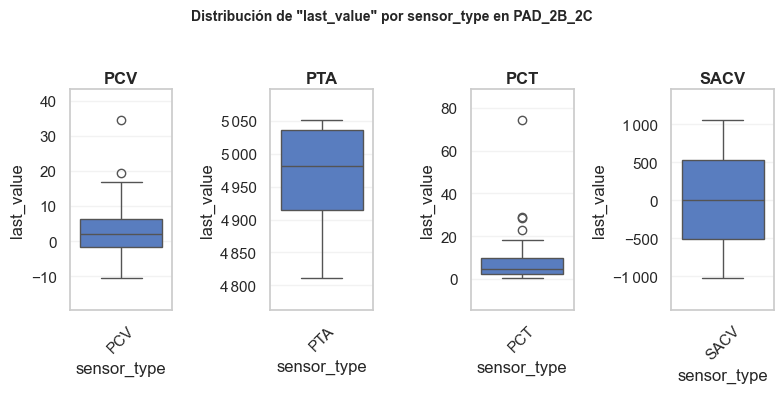

In [59]:
# Crear gráficos para cada estructura con subplots por sensor_type
for structure in structures:
    subset = df[df['structure'] == structure]
    sensor_types = subset['sensor_type'].unique()
    num_sensor_types = len(sensor_types)

    fig, axes = plt.subplots(nrows=1, ncols=num_sensor_types, figsize=(2 * num_sensor_types, 4))
    fig.suptitle(f'Distribución de "last_value" por sensor_type en {structure}', fontsize=10)

    if num_sensor_types == 1:
        axes = [axes]  # Para hacerlo iterable si solo hay un sensor_type

    for ax, sensor_type in zip(axes, sensor_types):
        sensor_subset = subset[subset['sensor_type'] == sensor_type]

        if not sensor_subset.empty and sensor_subset['last_value'].notna().any():
            sns.boxplot(data=sensor_subset, x='sensor_type', y='last_value', ax=ax)
            ax.set_title(sensor_type)
            ax.set_xlabel('sensor_type')
            ax.set_ylabel('last_value')
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

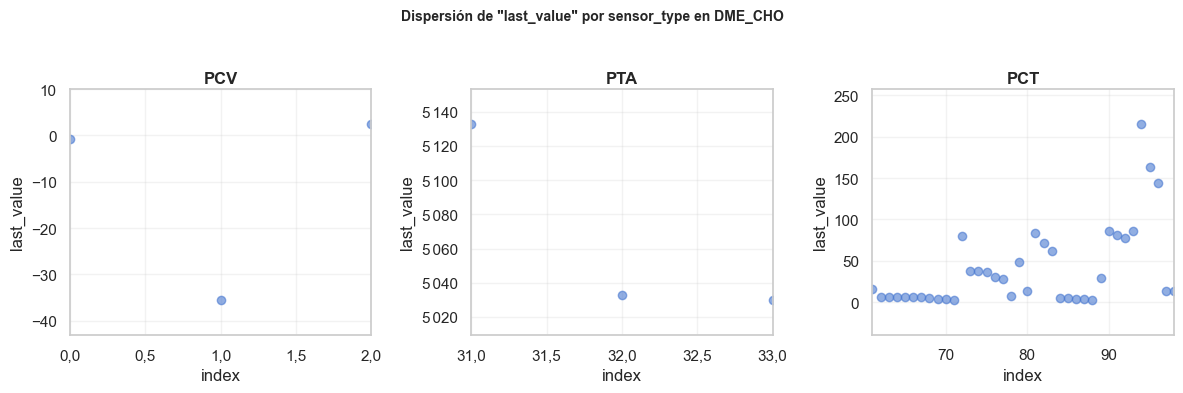

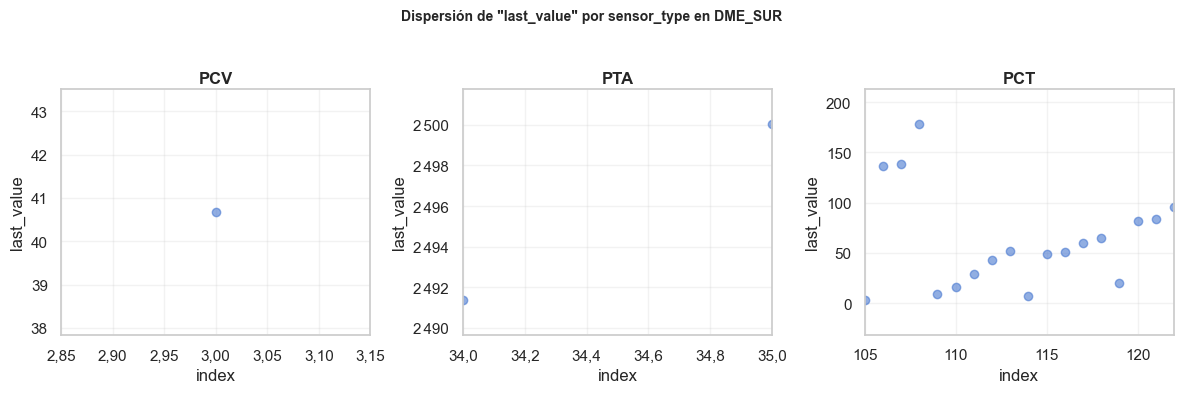

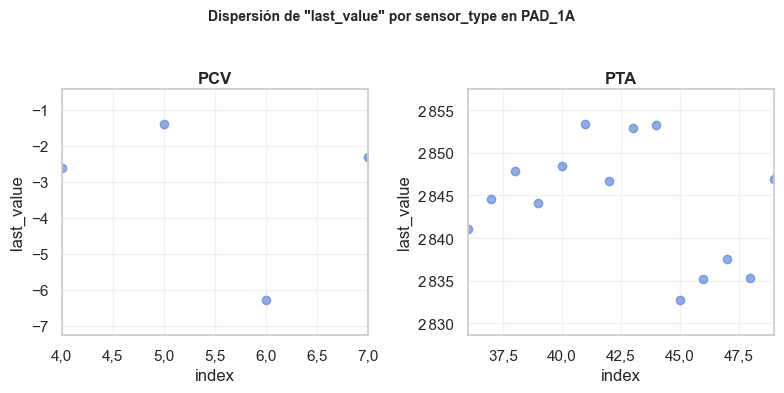

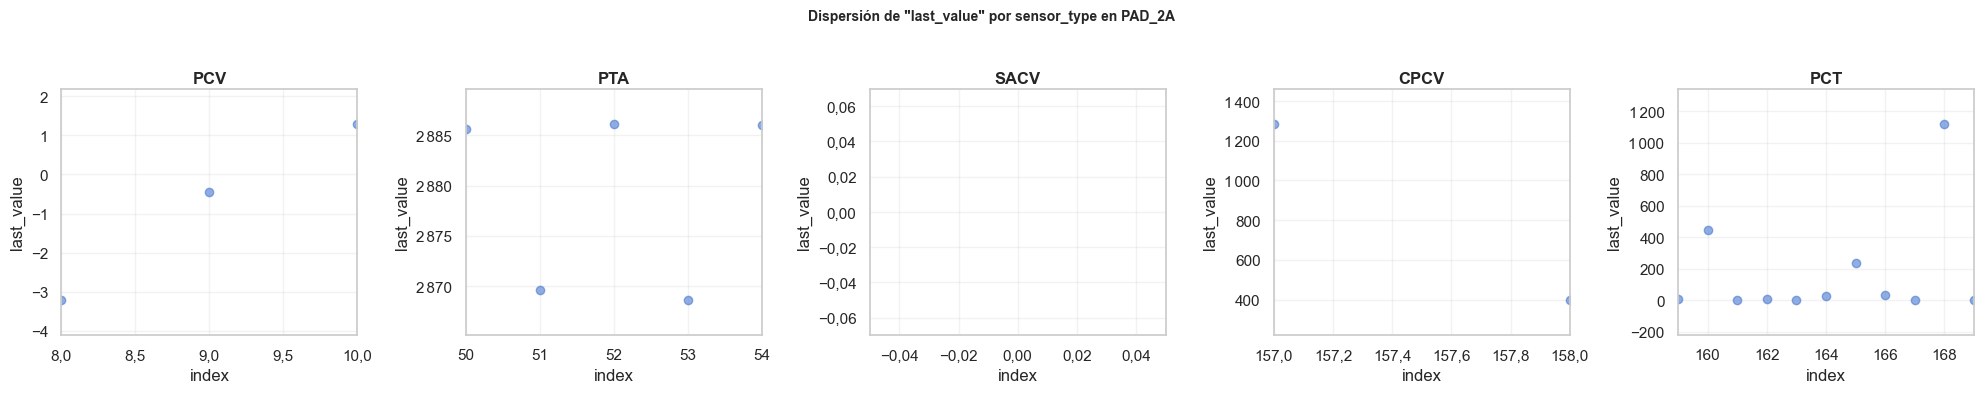

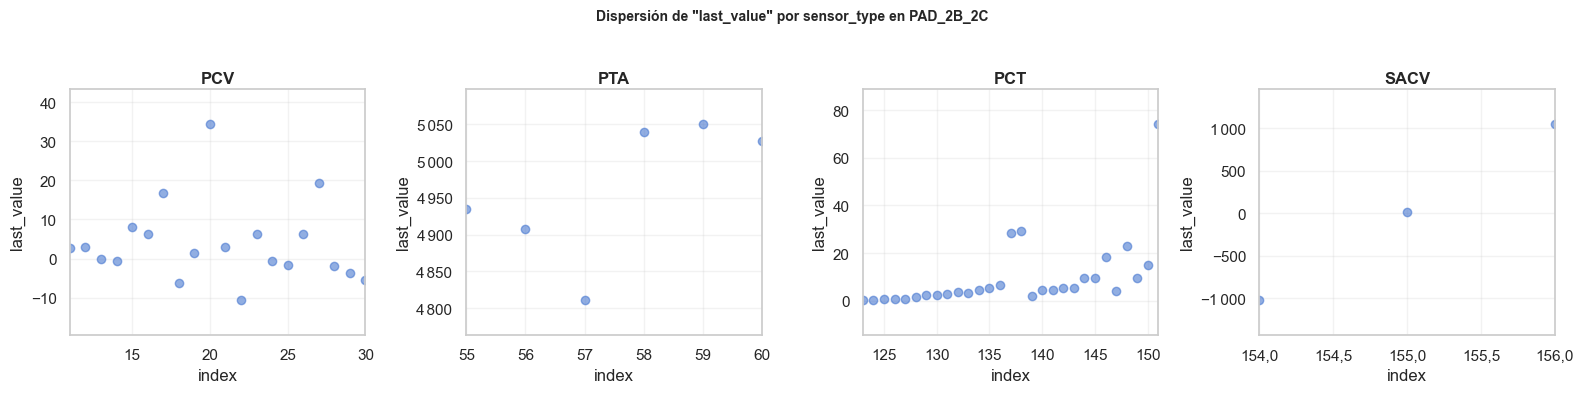

In [60]:
for structure in structures:
    subset = df[df['structure'] == structure]
    sensor_types = subset['sensor_type'].unique()
    num_sensor_types = len(sensor_types)
    
    fig, axes = plt.subplots(nrows=1, ncols=num_sensor_types, figsize=(4 * num_sensor_types, 4))
    fig.suptitle(f'Dispersión de "last_value" por sensor_type en {structure}', fontsize=10)
    
    if num_sensor_types == 1:
        axes = [axes]  # Asegurarse de que axes sea iterable
    
    for ax, sensor_type in zip(axes, sensor_types):
        sensor_subset = subset[subset['sensor_type'] == sensor_type]
        
        # Scatter plot: eje x es índice (o tiempo si tienes), eje y es last_value
        ax.scatter(sensor_subset.index, sensor_subset['last_value'], alpha=0.6)
        ax.set_title(f'{sensor_type}')
        ax.set_xlabel('index')  # Cambiar a 'Tiempo' si tienes columna de timestamp
        ax.set_ylabel('last_value')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [61]:
# Ruta base de los archivos DXF
dxf_base_path = f"{base_path}/data/config/sample_client/sample_project/dxf"

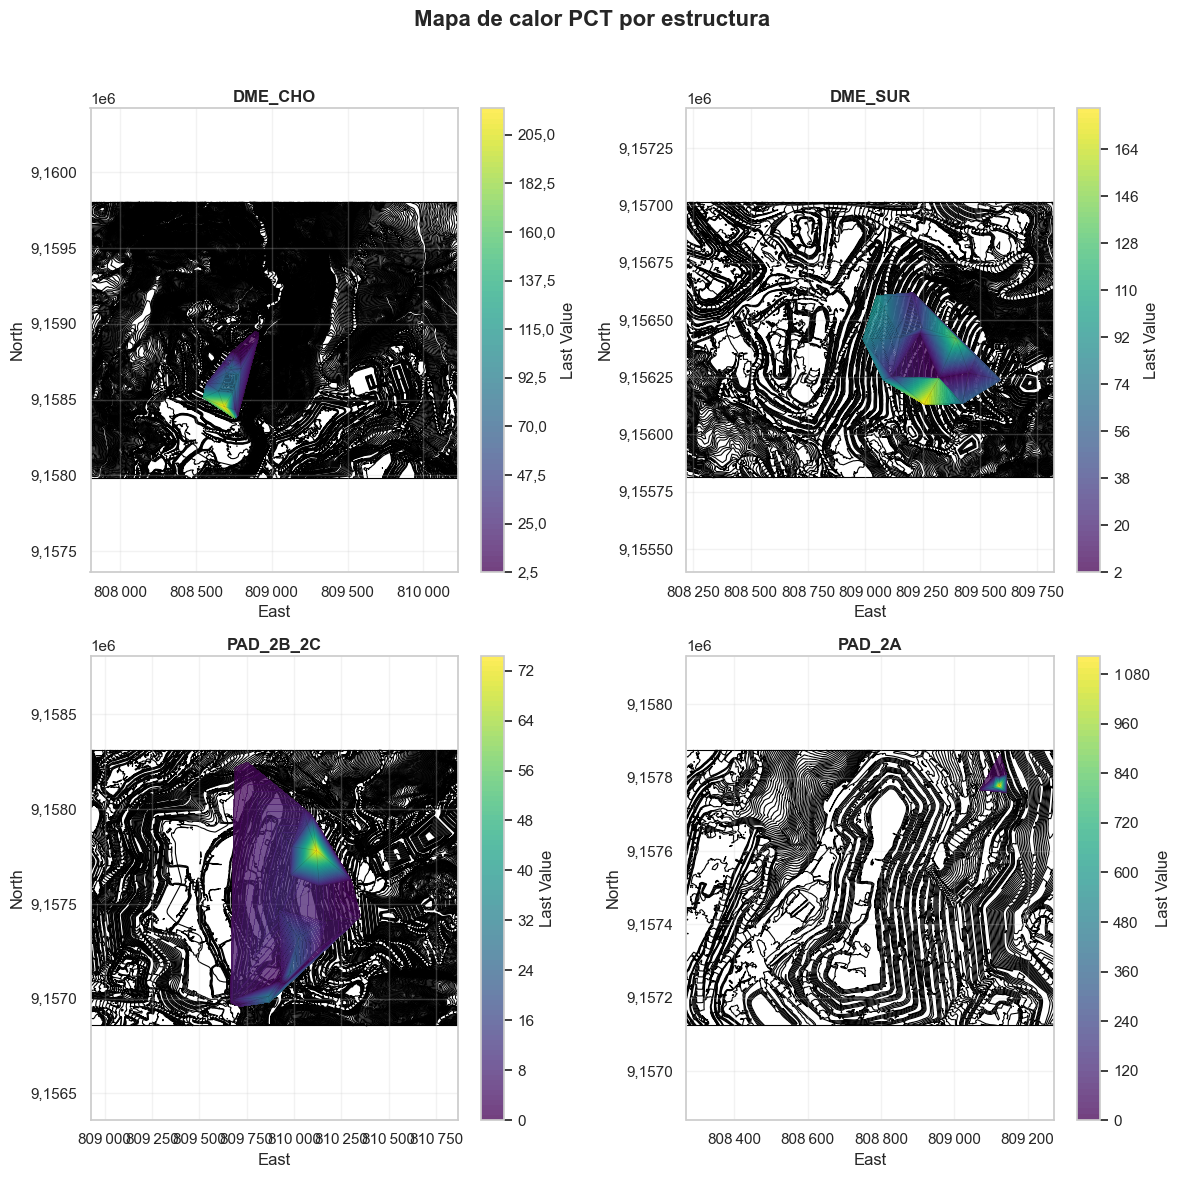

In [62]:
# Filtrar el dataframe por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT']

# Obtener estructuras únicas
structures = df_pct['structure'].unique()
num_structures = len(structures)

# Layout de subplots
cols = 2
rows = (num_structures + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()

# Colormap base
cmap = plt.get_cmap('viridis')

for i, structure in enumerate(structures):
    subset = df_pct[df_pct['structure'] == structure]
    
    x = subset['east'].astype(float).values
    y = subset['north'].astype(float).values
    z = subset['last_value'].values

    # Filtrar valores válidos
    valid_mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(z)
    x, y, z = x[valid_mask], y[valid_mask], z[valid_mask]

    ax = axes[i]

    # Leer y graficar DXF si existe (al fondo con zorder bajo)
    dxf_path = os.path.join(dxf_base_path, f"{structure}.dxf")
    if os.path.exists(dxf_path):
        doc = ezdxf.readfile(dxf_path)
        msp = doc.modelspace()

        for entity in msp.query('LWPOLYLINE'):
            points = list(entity.get_points())
            if len(points) >= 2:
                x_coords = [pt[0] for pt in points]
                y_coords = [pt[1] for pt in points]
                ax.plot(x_coords, y_coords, color='black', linewidth=0.8, zorder=0)

    if len(x) >= 3:
        triang = tri.Triangulation(x, y)

        # Normalización individual por estructura
        norm = mcolors.Normalize(vmin=np.min(z), vmax=np.max(z))
        tcf = ax.tricontourf(triang, z, cmap=cmap, levels=100, norm=norm, alpha=0.75)
        ax.triplot(triang, color='k', linewidth=0.3, alpha=0.3)

        # Barra de color individual
        cbar = fig.colorbar(tcf, ax=ax, orientation='vertical')
        cbar.set_label('Last Value')

    ax.set_title(f'{structure}')
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    ax.grid(True)
    ax.axis('equal')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Mapa de calor PCT por estructura', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


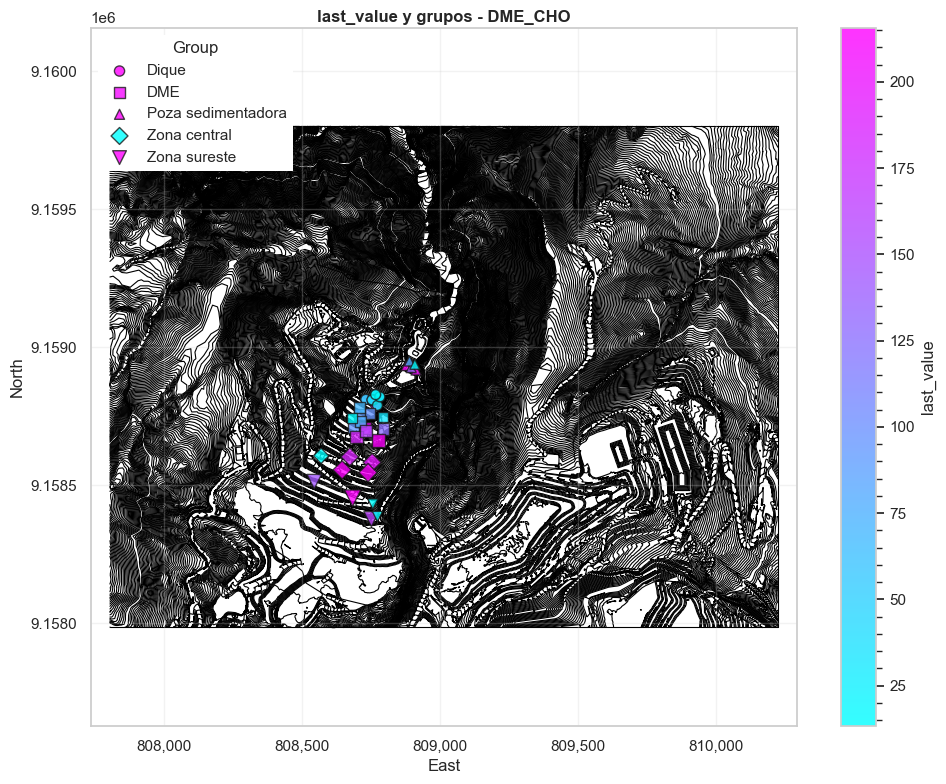

Valores para la estructura: DME_CHO
                 group         east        north  last_value
88  Poza sedimentadora  808910.7150  9158938.857    2.546566
71               Dique  808768.4015  9158828.994    3.120096
87  Poza sedimentadora  808891.1735  9158950.900    3.469150
70               Dique  808783.8930  9158821.023    3.561952
69               Dique  808775.1665  9158789.986    3.564407
86  Poza sedimentadora  808897.1265  9158926.954    4.264681
68               Dique  808755.2640  9158809.861    4.831408
85  Poza sedimentadora  808915.1015  9158918.136    5.077893
84  Poza sedimentadora  808879.4250  9158934.114    5.233307
67               Dique  808756.2145  9158809.291    5.699781
66               Dique  808761.0270  9158810.165    5.935697
65               Dique  808732.9225  9158811.731    6.038833
64               Dique  808770.0255  9158831.114    6.402539
63               Dique  808732.8535  9158811.749    6.539304
62               Dique  808783.6465  9158821.121 

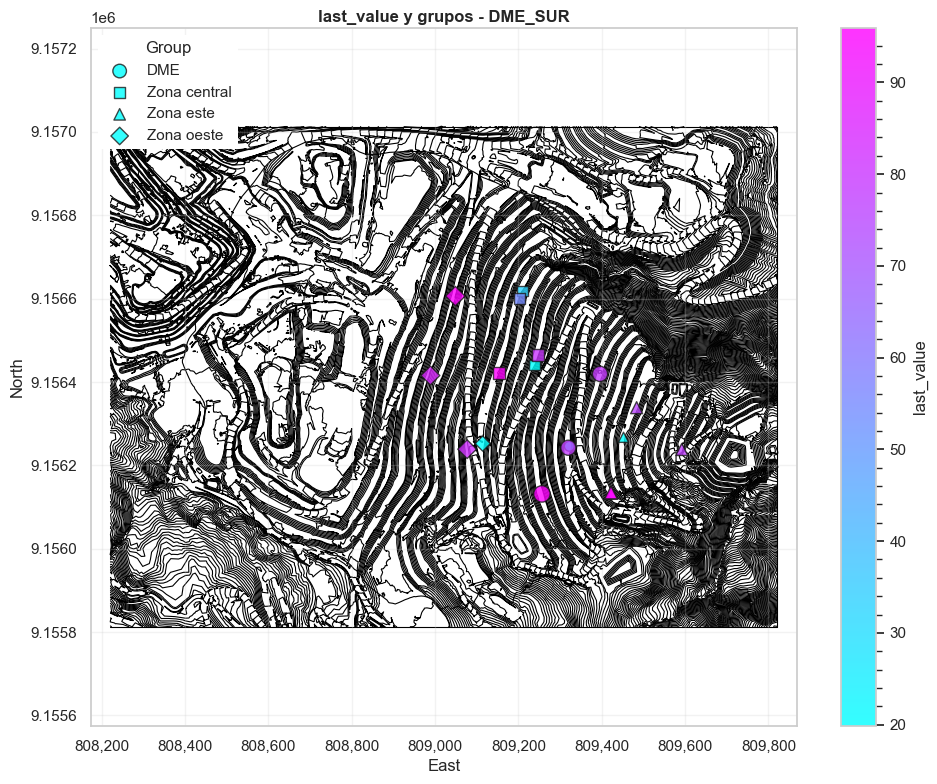

Valores para la estructura: DME_SUR
            group         east        north  last_value
105           DME  809322.1880  9156245.940    2.985800
114     Zona este  809452.2060  9156267.417    6.873864
109  Zona central  809238.8490  9156440.154    8.726540
110  Zona central  809209.4470  9156618.445   16.276670
119    Zona oeste  809114.3925  9156252.294   19.819057
111  Zona central  809201.6585  9156601.052   28.567858
112  Zona central  809247.7310  9156465.635   42.930729
115     Zona este  809483.5920  9156338.511   49.184881
116     Zona este  809591.9815  9156238.261   50.574005
113  Zona central  809152.7930  9156422.607   52.178180
117     Zona este  809423.8690  9156133.562   59.583240
118     Zona este  809422.0780  9156134.901   64.839031
120    Zona oeste  809076.9650  9156238.844   81.577095
121    Zona oeste  808988.8565  9156415.643   84.135040
122    Zona oeste  809048.7275  9156606.051   95.968862
106           DME  809319.7450  9156242.318  136.410099
107         

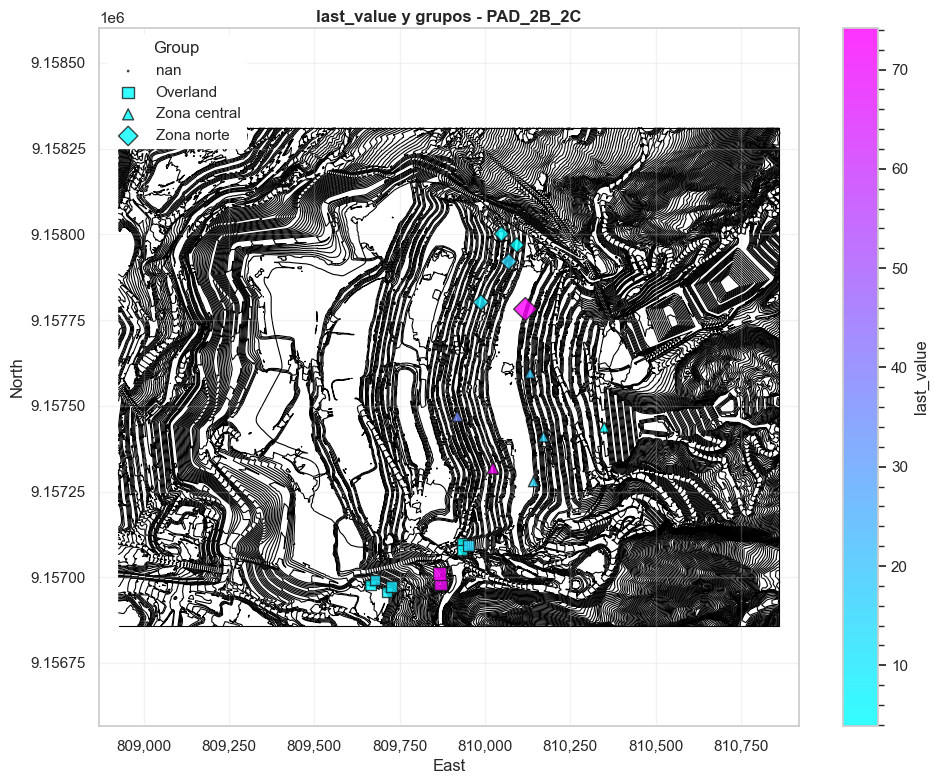

Valores para la estructura: PAD_2B_2C
            group         east        north  last_value
123           NaN  809685.5610  9158219.079    0.282843
124           NaN  809957.0370  9157082.609    0.424264
125           NaN  809753.5690  9158248.703    0.500000
126           NaN  810302.2180  9157625.225    0.519615
127           NaN  809716.9410  9158209.843    0.648074
128           NaN  809919.8370  9157090.213    1.720465
139  Zona central  810349.2240  9157437.780    1.987461
129      Overland  809931.7390  9157098.509    2.408319
130      Overland  809664.4880  9156977.688    2.443358
131      Overland  809933.6660  9157079.339    2.844293
133           NaN  810330.9450  9157414.018    3.374907
132      Overland  809711.9810  9156957.959    3.757659
147    Zona norte  810093.2740  9157968.900    3.860052
134      Overland  809726.1400  9156973.114    4.421538
140  Zona central  810171.5270  9157409.848    4.438468
141  Zona central  810142.3050  9157279.277    4.549725
142    Zon

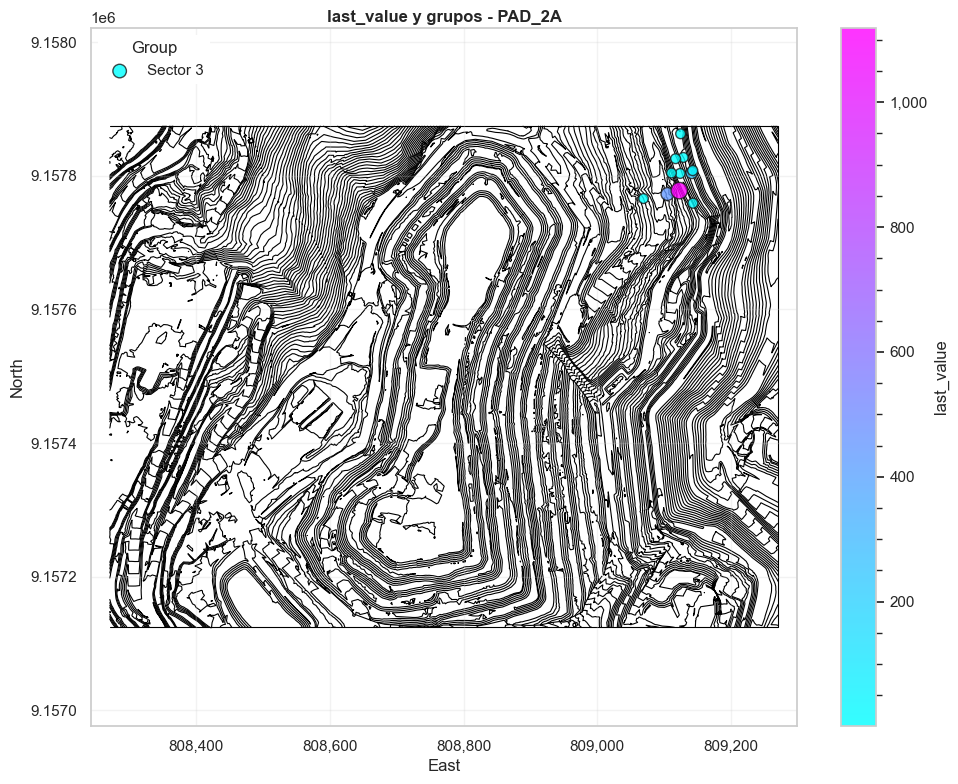

Valores para la estructura: PAD_2A
        group        east        north   last_value
163  Sector 3  809117.060  9157825.690     0.509902
167  Sector 3  809124.620  9157863.005     0.860233
161  Sector 3  809069.021  9157766.049     1.081665
169  Sector 3  809110.886  9157804.241     2.032240
159  Sector 3  809123.914  9157803.585     3.781534
162  Sector 3  809128.712  9157827.540     4.060788
164  Sector 3  809143.015  9157759.093    25.910809
166  Sector 3  809142.673  9157807.962    32.868374
165  Sector 3  809141.266  9157804.560   233.413217
160  Sector 3  809104.986  9157772.830   444.920869
168  Sector 3  809122.614  9157777.910  1119.466382




In [65]:
# Define una lista de markers disponibles
marker_styles = ['o', 's', '^', 'D', 'v', '<', '>', 'P', 'X', '*', 'h', '+', 'x']

# Filtrar por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT'].copy()

# Eliminar filas donde 'last_value' es NaN
df_pct = df_pct.dropna(subset=['last_value'])

# Omitir estructuras que no tienen sensores PCT
unique_structures = df_pct['structure'].dropna().unique()
df_pct = df_pct[df_pct['structure'].isin(unique_structures)]

# Asegurarse de que las columnas 'east' y 'north' sean de tipo float
df_pct['east'] = df_pct['east'].astype(float)
df_pct['north'] = df_pct['north'].astype(float)

# Iterar sobre cada 'structure'
for structure in df_pct['structure'].unique():
    df_structure = df_pct[df_pct['structure'] == structure].copy()

    # Datos y pesos normalizados por last_value global (estructura)
    values = df_structure['last_value'].astype(float).values
    weights = values / np.max(values)
    df_structure['weight'] = weights  # agregamos como columna para facilidad

    # Visualización
    plt.figure(figsize=(10, 8))

    unique_groups = df_structure['group'].unique()
    group_marker_map = {
        group: marker_styles[i % len(marker_styles)]
        for i, group in enumerate(unique_groups)
    }

    # Dibujar cada grupo con su símbolo y peso según last_value
    for group in unique_groups:
        df_group = df_structure[df_structure['group'] == group]

        plt.scatter(
            df_group['east'], df_group['north'],
            c=df_group['last_value'], cmap='cool',
            s=50 + 90 * df_group['weight'],  # Tamaño por last_value global
            alpha=0.8,
            edgecolor='k',
            marker=group_marker_map[group],
            label=str(group)
        )

    # Título y estética
    plt.title(f'last_value y grupos - {structure}')
    plt.xlabel('East')
    plt.ylabel('North')
    plt.colorbar(label='last_value')
    plt.grid(True)
    plt.axis('equal')
    plt.legend(title='Group', framealpha=1.0)

    # Leer y graficar DXF si existe
    dxf_path = os.path.join(dxf_base_path, f"{structure}.dxf")
    if os.path.exists(dxf_path):
        doc = ezdxf.readfile(dxf_path)
        msp = doc.modelspace()
        for entity in msp.query('LWPOLYLINE'):
            points = list(entity.get_points())
            if len(points) >= 2:
                x_coords = [pt[0] for pt in points]
                y_coords = [pt[1] for pt in points]
                plt.plot(x_coords, y_coords, color='black', linewidth=0.8, zorder=0)

    plt.show()

    # Mostrar detalles
    print(f"Valores para la estructura: {structure}")
    print(df_structure[['group', 'east', 'north', 'last_value']].sort_values(by='last_value'))
    print("\n")
